# COVID-19 Data Analysis

This is a simple analysis of the confirmed, deaths and recovered cases of COVID-19 as of August 10, 2020.

Datasets are available at: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases?force_layout=desktop#

### Load libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

### Import data

In [9]:
confirmed_raw = pd.read_csv("data/time_series_covid19_confirmed_global.csv")
deaths_raw = pd.read_csv("data/time_series_covid19_deaths_global.csv")
recovered_raw = pd.read_csv("data/time_series_covid19_recovered_global.csv")

In [3]:
confirmed_raw.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,925,937,939,939,944,955,955,955,963,963
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,91,92,92,92,92,92,92,92,92,92
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,201919,206743,213535,220682,228195,235677,241811,246499,253868,260911
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,39050,39102,39298,39586,39819,39985,40185,40410,40433,40593
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,3797,3809,3820,3832,3842,3851,3861,3875,3897,3915


In [6]:
deaths_raw.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1284,1288,1288,1294,1298,1307,1312,1312,1328,1344
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,166,172,176,182,188,189,193,199,200,205
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1231,1239,1248,1261,1273,1282,1293,1302,1312,1322
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,55,58,59,62,64,67,70,75,78,80
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,3648,3813,3979,4106,4251,4411,4523,4606,4764,5004
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,754,762,768,770,772,777,785,791,796,803
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,50,50,50,50,50,50,50,50,50,50


In [7]:
recovered_raw.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3018,3031,3031,3123,3155,3227,3268,3342,3379,3480
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,21419,21901,22375,22802,23238,23667,24083,24506,24920,25263
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,807,821,825,825,828,839,839,839,839,839
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,461,476,503,506,520,544,564,567,569,575
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,67,75,75,76,76,76,76,76,76,76
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,89026,91302,94129,96948,99852,103297,108242,108242,108242,181389
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,29750,29861,30372,30850,31556,32008,32395,32520,32616,33157
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,110,110,110,110,110,110,110,110,110,110
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,2991,2992,2994,2994,2994,2994,2994,2994,2994,2994


### Re-shape data

##### Drop useless columns

In [10]:
loc = ["Lat", "Long"]
confirmed_data = confirmed_raw.drop(loc, axis = 1)
deaths_data = deaths_raw.drop(loc, axis = 1)
recovered_data = recovered_raw.drop(loc, axis = 1)

##### Aggregate by country

Some countries have only one entry, while other have multiple entries (one by region/province/state). We aggregate by country to obtain the total number of cases.

In [11]:
confirmed_data = confirmed_data.groupby("Country/Region").sum()
deaths_data = deaths_data.groupby("Country/Region").sum()
recovered_data = recovered_data.groupby("Country/Region").sum()

Check data and shape

In [14]:
confirmed_data.shape

(188, 203)

In [16]:
confirmed_data.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269
Albania,0,0,0,0,0,0,0,0,0,0,...,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676
Algeria,0,0,0,0,0,0,0,0,0,0,...,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204
Andorra,0,0,0,0,0,0,0,0,0,0,...,925,937,939,939,944,955,955,955,963,963
Angola,0,0,0,0,0,0,0,0,0,0,...,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,91,92,92,92,92,92,92,92,92,92
Argentina,0,0,0,0,0,0,0,0,0,0,...,201919,206743,213535,220682,228195,235677,241811,246499,253868,260911
Armenia,0,0,0,0,0,0,0,0,0,0,...,39050,39102,39298,39586,39819,39985,40185,40410,40433,40593
Australia,0,0,0,0,4,5,5,6,9,9,...,18318,18730,19445,19890,20272,20698,21084,21397,21713,22127


In [17]:
recovered_data.shape

(188, 203)

In [19]:
recovered_data.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415
Albania,0,0,0,0,0,0,0,0,0,0,...,3018,3031,3031,3123,3155,3227,3268,3342,3379,3480
Algeria,0,0,0,0,0,0,0,0,0,0,...,21419,21901,22375,22802,23238,23667,24083,24506,24920,25263
Andorra,0,0,0,0,0,0,0,0,0,0,...,807,821,825,825,828,839,839,839,839,839
Angola,0,0,0,0,0,0,0,0,0,0,...,461,476,503,506,520,544,564,567,569,575
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,67,75,75,76,76,76,76,76,76,76
Argentina,0,0,0,0,0,0,0,0,0,0,...,89026,91302,94129,96948,99852,103297,108242,108242,108242,181389
Armenia,0,0,0,0,0,0,0,0,0,0,...,29750,29861,30372,30850,31556,32008,32395,32520,32616,33157
Australia,0,0,0,0,0,0,0,0,2,2,...,10622,10623,10799,10941,11119,11560,11874,11876,12144,12395


In [20]:
deaths_data.shape

(188, 203)

In [21]:
deaths_data.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1284,1288,1288,1294,1298,1307,1312,1312,1328,1344
Albania,0,0,0,0,0,0,0,0,0,0,...,166,172,176,182,188,189,193,199,200,205
Algeria,0,0,0,0,0,0,0,0,0,0,...,1231,1239,1248,1261,1273,1282,1293,1302,1312,1322
Andorra,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
Angola,0,0,0,0,0,0,0,0,0,0,...,55,58,59,62,64,67,70,75,78,80
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
Argentina,0,0,0,0,0,0,0,0,0,0,...,3648,3813,3979,4106,4251,4411,4523,4606,4764,5004
Armenia,0,0,0,0,0,0,0,0,0,0,...,754,762,768,770,772,777,785,791,796,803
Australia,0,0,0,0,0,0,0,0,0,0,...,221,232,247,255,266,278,295,313,331,352


### Visualize time series

##### Confirmed cases

In the countries where the infection started earlier, the number of cases have estabilized since the middle of April (approx.). The number of confirmed cases in Mexico has just started growing exponentially.

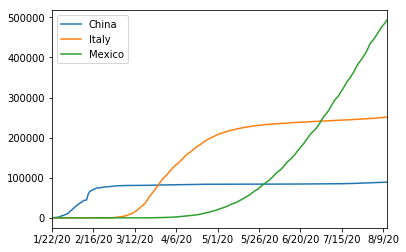

In [23]:
confirmed_data.loc["China"].plot()
confirmed_data.loc["Italy"].plot()
#confirmed_data.loc["US"].plot()
confirmed_data.loc["Mexico"].plot()
plt.legend()

##### Deaths

The number of deaths has followed more or less the same behavior.

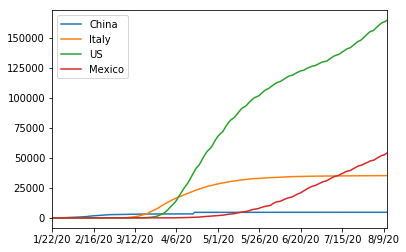

In [25]:
deaths_data.loc["China"].plot()
deaths_data.loc["Italy"].plot()
deaths_data.loc["US"].plot()
deaths_data.loc["Mexico"].plot()
plt.legend()

##### Recovered

Follows the same pattern as the number of confirmed cases

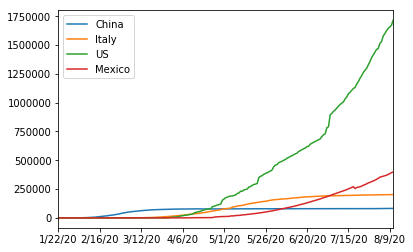

In [26]:
recovered_data.loc["China"].plot()
recovered_data.loc["Italy"].plot()
recovered_data.loc["US"].plot()
recovered_data.loc["Mexico"].plot()
plt.legend()

##### Comparing by country

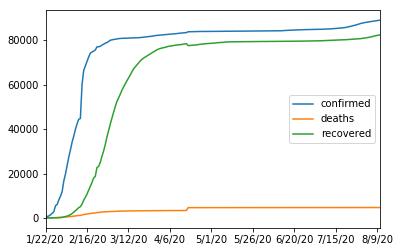

In [31]:
confirmed_data.loc["China"].plot(label = "confirmed")
deaths_data.loc["China"].plot(label = "deaths")
recovered_data.loc["China"].plot(label = "recovered")
plt.legend()

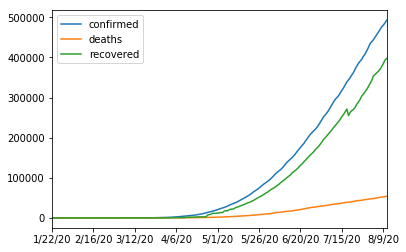

In [32]:
confirmed_data.loc["Mexico"].plot(label = "confirmed")
deaths_data.loc["Mexico"].plot(label = "deaths")
recovered_data.loc["Mexico"].plot(label = "recovered")
plt.legend()

### Calculate infection rate

To find how rapidly the number of cases is changing, or rate of change, we can use the first derivative of the data to approximate the infection rate.

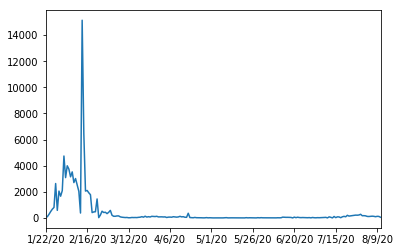

In [33]:
confirmed_data.loc["China"].diff().plot()

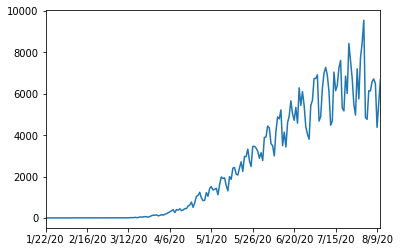

In [35]:
confirmed_data.loc["Mexico"].diff().plot()

Some countries have a steady number of confirmed cases, it means that the number of new cases every day is zero (or very close to zero). This allows to identify a clear maximum, or peak of contagion. 

In some other regions, the number of new cases confirmed every day is increasing, or constantly changing. It hasn't arrived to the plateau state, and it is not possible to identify an absolute maximum.

In [55]:
countries = list(confirmed_data.index)
max_infection_rates = []
max_death_rates = []
max_recovered_rates = []
for c in countries :
    max_infection_rates.append(confirmed_data.loc[c].diff().max())
    max_death_rates.append(deaths_data.loc[c].diff().max())
    max_recovered_rates.append(recovered_data.loc[c].diff().max())
confirmed_data["max_infection_rate"] = max_infection_rates
deaths_data["max_death_rate"] = max_death_rates
recovered_data["max_recovered_rate"] = max_recovered_rates

In [62]:
corona_data = pd.DataFrame(data=[confirmed_data["max_infection_rate"], 
                                 deaths_data["max_death_rate"],
                                recovered_data["max_recovered_rate"]]).transpose()


In [63]:
corona_data.head()

,max_infection_rate,max_death_rate,max_recovered_rate
Country/Region,,,
Afghanistan,915.0,46.0,1930.0
Albania,140.0,6.0,101.0
Algeria,675.0,30.0,749.0
Andorra,79.0,4.0,57.0
Angola,100.0,6.0,94.0


### Correlation with life expentacy indeces

We can use the data from the World Wide Happiness Report to compare the number of confirmed cases, deaths or recoveies according to differnt measures of quality of life in different countries.

##### Import the data

In [79]:
happiness_report = pd.read_csv("data/worldwide_happiness_report.csv")

In [71]:
happiness_report.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [80]:
happiness_report.set_index("Country or region", inplace= True) 
happiness_report.drop(["Overall rank", "Score", "Generosity"], axis = 1, inplace = True)

In [81]:
happiness_report.shape

(156, 5)

##### Merge data frames

In [82]:
data = corona_data.join(happiness_report, how="inner")
data.head()

,max_infection_rate,max_death_rate,max_recovered_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Afghanistan,915.0,46.0,1930.0,0.350,0.517,0.361,0.000,0.025
Albania,140.0,6.0,101.0,0.947,0.848,0.874,0.383,0.027
Algeria,675.0,30.0,749.0,1.002,1.160,0.785,0.086,0.114
Argentina,7513.0,240.0,73147.0,1.092,1.432,0.881,0.471,0.050
Armenia,771.0,19.0,1013.0,0.850,1.055,0.815,0.283,0.064


##### Correlation matrix

In [83]:
data.corr()

,max_infection_rate,max_death_rate,max_recovered_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
max_infection_rate,1.000000,0.709578,0.796867,0.102627,0.071652,0.090624,0.088063,-0.056863
max_death_rate,0.709578,1.000000,0.427010,0.146573,0.119037,0.185858,0.096482,-0.037303
max_recovered_rate,0.796867,0.427010,1.000000,0.099484,0.109344,0.086593,0.098376,-0.049864
GDP per capita,0.102627,0.146573,0.099484,1.000000,0.757521,0.859431,0.394799,0.311759
Social support,0.071652,0.119037,0.109344,0.757521,1.000000,0.751632,0.456317,0.203333
Healthy life expectancy,0.090624,0.185858,0.086593,0.859431,0.751632,1.000000,0.423146,0.311566
Freedom to make life choices,0.088063,0.096482,0.098376,0.394799,0.456317,0.423146,1.000000,0.446845
Perceptions of corruption,-0.056863,-0.037303,-0.049864,0.311759,0.203333,0.311566,0.446845,1.000000


The values of the Pearson correlation are below the medium significance level (0.5). There are little relation between key life-quality indeces and the maximum number of cases of COVID-19 reported.

The more significant relations correspond to the number of deaths and life expentancy. We can explore this in detail.

### Visualization of the results

##### Healthy life expentacy vs. death rate

Simple scatter plot with an adjusted linear regression

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


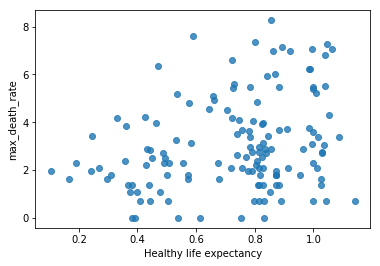

In [89]:
x = data["Healthy life expectancy"]
y = data["max_death_rate"]
sns.regplot(x, np.log(y))

##### GDP vs. infection rate

Simple scatter plot with linear regression

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


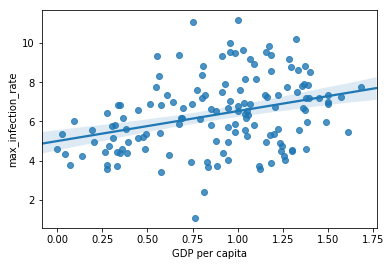

In [90]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.regplot(x, np.log(y))

##### Social support vs. recovery rate

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


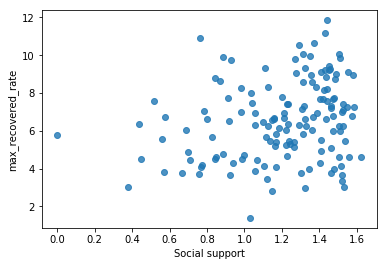

In [91]:
x = data["Social support"]
y = data["max_recovered_rate"]
sns.regplot(x, np.log(y))

### Conclusion

There is a small but clear relationship between the number of infection cases and the wealth of a nation, i.e. wealthier nations have a higher infection rate. This is also true for the number of deaths.

There is no clear relationship between the quality of the support system and the number of recovery cases. This could reflect the absence of an effective treatment. 

Healthy life expentancy has a stronger relationship with the number of deaths by country. Maybe we can relate this with the averge age of the population, since countries with higher life expentancy have an older population and COVID-19 severly affects the elderly, and most of the deaths are from this age group.

Disclaimer: This is a simple analysis inspired by the proyect for COVID-19 data analysis by Ahmad Varasteh in Coursera. Further considerations need to be made for more precise conclusions.